In [1]:
%run -i 'python_files/cleaning_csv.py'

# Cleaning CSV file

In [11]:
marvel = reading_csv("mcu")
marvel.head()

,Unnamed: 0,character,line,movie,year,words,Adam McKay,Anna Boden,Art Marcum,Ashley Edward Miller,...,Joss Whedon,Justin Theroux,Mark Fergus,Matt Holloway,Paul Rudd,Ryan Coogler,Ryan Fleck,Shane Black,Stephen McFeely,Zack Stentz
0,0,TONY STARK,"Oh, I get it. You guys aren’t allowed to talk...",Iron Man,2008,22,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
1,1,IRON MAN JIMMY,No. We’re allowed to talk.,Iron Man,2008,6,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
2,2,TONY STARK,Oh. I see. So it’s personal.,Iron Man,2008,8,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
3,3,RAMIREZ,I think they’re intimidated.,Iron Man,2008,4,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
4,4,TONY STARK,"Good God, you’re a woman. I, honestly, I could...",Iron Man,2008,31,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False


### Drop unnecessary columns:

In [13]:
marvel = dropping_columns()

### Sentiment Analysis:

Let's create an example to understand how the NLTK works:

In [25]:
#Random line from DataFrame to analyze its text
example = marvel["line"][50]
example

'I’m sorry, “Tony”, I was hoping for a serious answer. '

In [24]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(example)

{'neg': 0.25, 'neu': 0.481, 'pos': 0.269, 'compound': 0.296}

Once it is understood, run the polarity on the entire dataset:

In [22]:
res = {}
for i, row in tqdm(marvel.iterrows(), total=len(marvel)):
    text = row["line"]
    myid = row["Unnamed: 0"]
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/15724 [00:00<?, ?it/s]

In [26]:
#Create a new DataFrame with the results:
vaders = pd.DataFrame(res).T
vaders.reset_index().rename(columns={'index': 'id'})

,id,neg,neu,pos,compound
0,0,0.000,1.000,0.000,0.0000
1,1,0.355,0.645,0.000,-0.2960
2,2,0.000,1.000,0.000,0.0000
3,3,0.592,0.408,0.000,-0.4404
4,4,0.000,0.758,0.242,0.5719
...,...,...,...,...,...
15719,15719,0.000,1.000,0.000,0.0000
15720,15720,0.000,0.374,0.626,0.7717
15721,15721,0.000,1.000,0.000,0.0000
15722,15722,0.000,1.000,0.000,0.0000


In [27]:
#Match both table indexes for being able to merge them
marvel.reset_index().rename(columns={'index': 'id'})

,id,Unnamed: 0,character,line,movie,year,words
0,0,0,TONY STARK,"Oh, I get it. You guys aren’t allowed to talk...",Iron Man,2008,22
1,1,1,IRON MAN JIMMY,No. We’re allowed to talk.,Iron Man,2008,6
2,2,2,TONY STARK,Oh. I see. So it’s personal.,Iron Man,2008,8
3,3,3,RAMIREZ,I think they’re intimidated.,Iron Man,2008,4
4,4,4,TONY STARK,"Good God, you’re a woman. I, honestly, I could...",Iron Man,2008,31
...,...,...,...,...,...,...,...
15719,15719,15719,STEVE ROGERS,It isn’t.,Avengers: Endgame,2019,2
15720,15720,15720,SAM WILSON,Thank you. I’ll try my best.,Avengers: Endgame,2019,7
15721,15721,15721,STEVE ROGERS,That’s why it’s yours.,Avengers: Endgame,2019,4
15722,15722,15722,SAM WILSON,You gonna tell me about her?,Avengers: Endgame,2019,6


### Merge both DataFrames:

In [29]:
marvel_sentiment = pd.merge(marvel, vaders, left_index=True, right_index=True, how='outer')

In [30]:
marvel_sentiment = drop_rename()

In [136]:
marvel_sentiment.to_csv('/Users/lauurasarabia/Ironhack/projects/project4/data/marvel_sentiment.csv')

In [31]:
marvel_sentiment[:5]

,full_name,line,movie,year,words,neg,neu,pos,compound
0,TONY STARK,"Oh, I get it. You guys aren’t allowed to talk...",Iron Man,2008,22,0.000,1.000,0.000,0.0000
1,IRON MAN JIMMY,No. We’re allowed to talk.,Iron Man,2008,6,0.355,0.645,0.000,-0.2960
2,TONY STARK,Oh. I see. So it’s personal.,Iron Man,2008,8,0.000,1.000,0.000,0.0000
3,RAMIREZ,I think they’re intimidated.,Iron Man,2008,4,0.592,0.408,0.000,-0.4404
4,TONY STARK,"Good God, you’re a woman. I, honestly, I could...",Iron Man,2008,31,0.000,0.758,0.242,0.5719


### NLTK Visualizations:

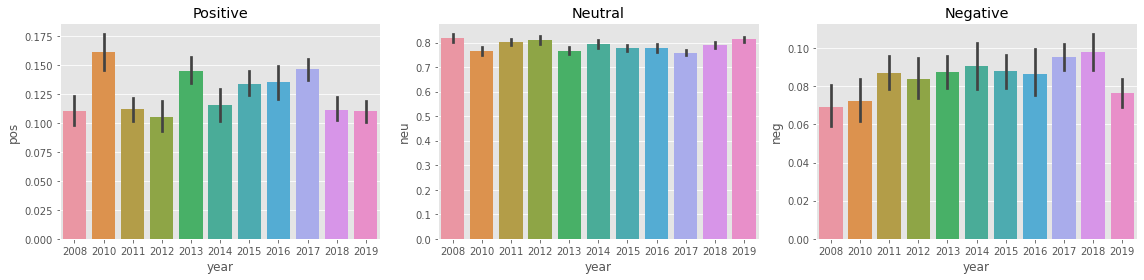

In [33]:
plotting_nltk()